==========================================================================
# 📁 **ATIVIDADE FIAP - FarmTech na era da cloud computing**
==========================================================================

**Autor.....:** Diego Nunes Veiga

**RM........:** 560658

**Turma...:** Graduação - 1TIAOR

**Data......:** 10/03/2025

==========================================================================


## **↪ Introdução dos dados**

In [95]:
# Importação das bibliotecas
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.cluster import KMeans, DBSCAN

In [96]:
# Carregar o dataset
df = pd.read_csv("crop_yield.csv")

# Renomeando colunas para melhor apresentação
df.rename(columns={
    "Crop": "Cultura",
    "Precipitation (mm day-1)": "Precipitação (mm/dia)",
    "Specific Humidity at 2 Meters (g/kg)": "Umidade Específica (g/kg)",
    "Relative Humidity at 2 Meters (%)": "Umidade Relativa (%)",
    "Temperature at 2 Meters (C)": "Temperatura (°C)",
    "Yield": "Rendimento (kg/ha)"
}, inplace=True)

# Exibir as primeiras linhas do DataFrame
df.head()

,Cultura,Precipitação (mm/dia),Umidade Específica (g/kg),Umidade Relativa (%),Temperatura (°C),Rendimento (kg/ha)
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800


In [97]:
# Apresentação das informações gerais dos dados do arquivo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cultura                    156 non-null    object 
 1   Precipitação (mm/dia)      156 non-null    float64
 2   Umidade Específica (g/kg)  156 non-null    float64
 3   Umidade Relativa (%)       156 non-null    float64
 4   Temperatura (°C)           156 non-null    float64
 5   Rendimento (kg/ha)         156 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.4+ KB


In [98]:
# Verificar a presença de dados duplicados

duplicates = df.duplicated().sum()
print("Número de dados duplicados:", duplicates)

Número de dados duplicados: 0


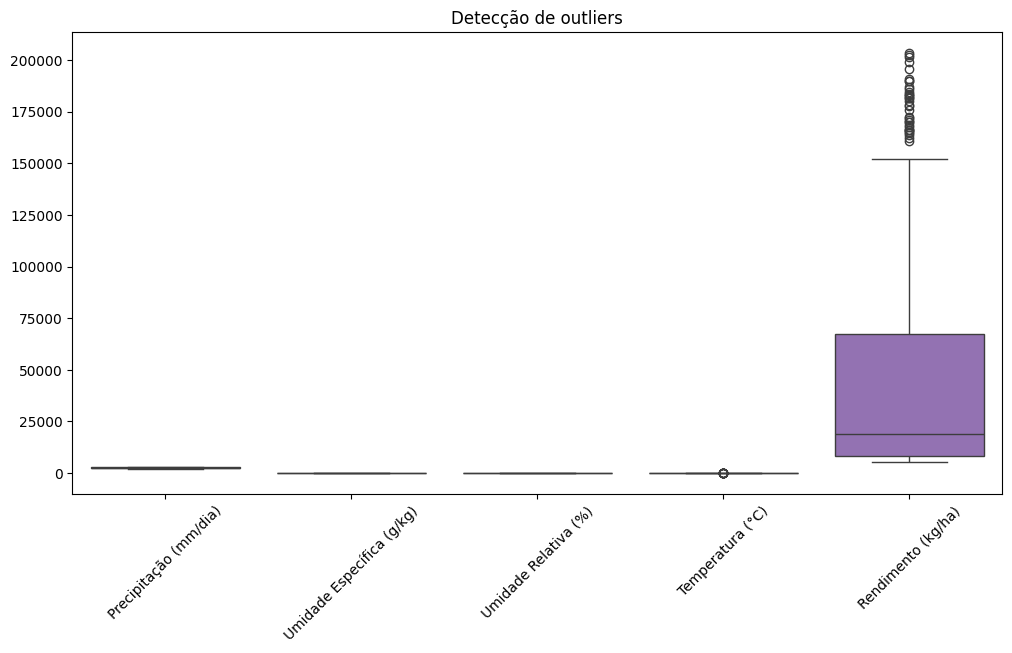

In [99]:
# Verificar a presença de outliers a partir da apresentação do Boxplot

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Detecção de outliers")
plt.xticks(rotation=45)
plt.show()

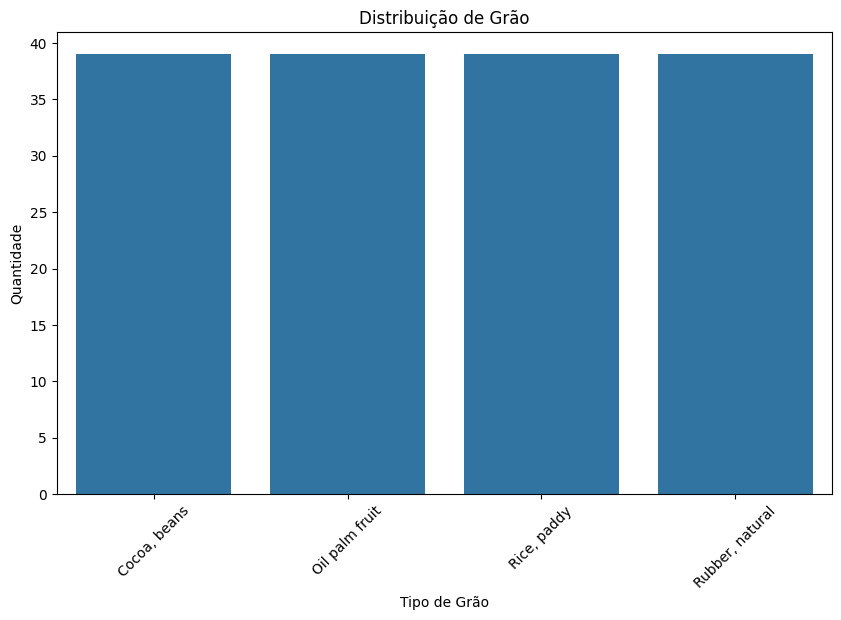

In [100]:
# Apresentação da distribuição dos labels

plt.figure(figsize=(10, 6))
sns.countplot(x='Cultura', data=df)
plt.title("Distribuição de Grão")
plt.xlabel("Tipo de Grão")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.show()

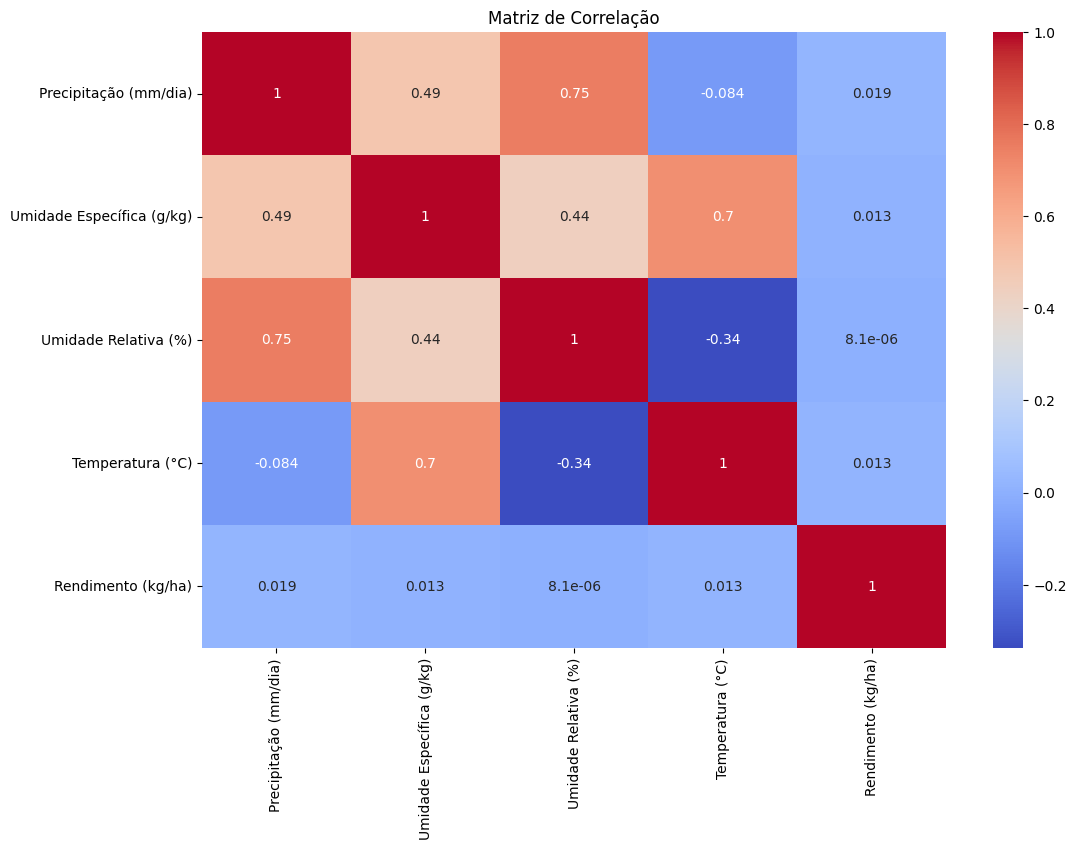

In [101]:
# Apresentação da matriz de correção

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=numerics).corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

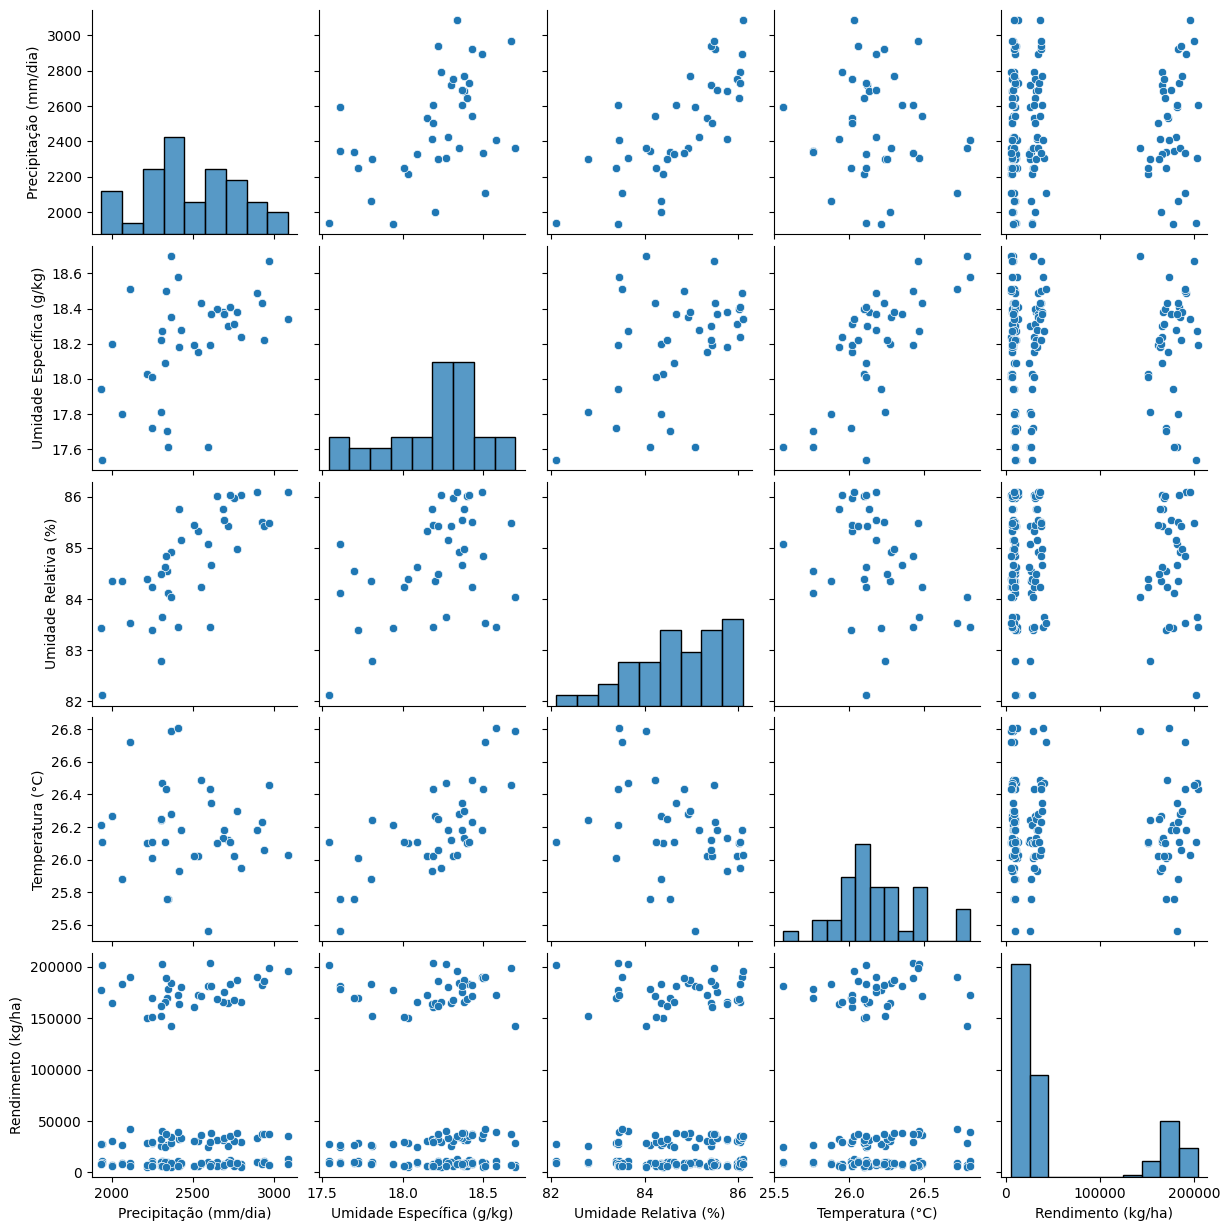

In [102]:
# Apresentação do relacionamento de todos os dados

sns.pairplot(df)
plt.show()

## ↪ **Limpeza dos dados**

In [103]:
# Realiza o comando para retirar todos os outliers

outlier_counts = {}

for coluna in ["Precipitação (mm/dia)", "Umidade Específica (g/kg)", "Umidade Relativa (%)", "Temperatura (°C)", "Rendimento (kg/ha)"]:

    ExibeValor = True

    while True:

        # Calcular os limites do IQR
        Q1 = df[coluna].quantile(0.25)
        Q3 = df[coluna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Contar os outliers da coluna atual
        outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
        num_outliers = len(outliers)

        # Coleta dados da qauntidade inicial de outliers
        if ExibeValor == True:
          outlier_counts[coluna] = len(outliers)
          ExibeValor = False

        # Verificar se ainda existem outliers
        if num_outliers == 0:
            break
        else:
            # Substituir os outliers pela mediana
            mediana = df[coluna].median()
            df[coluna] = df[coluna].apply(lambda x: mediana if x < limite_inferior or x > limite_superior else x)

# Exibir a quantidade de outliers para cada coluna
for coluna, count in outlier_counts.items():
    print(f"Coluna '{coluna}' possuia {count} outliers.")

# formatar o banco de dados
df.shape

Coluna 'Precipitação (mm/dia)' possuia 0 outliers.
Coluna 'Umidade Específica (g/kg)' possuia 0 outliers.
Coluna 'Umidade Relativa (%)' possuia 0 outliers.
Coluna 'Temperatura (°C)' possuia 12 outliers.
Coluna 'Rendimento (kg/ha)' possuia 35 outliers.


(156, 6)

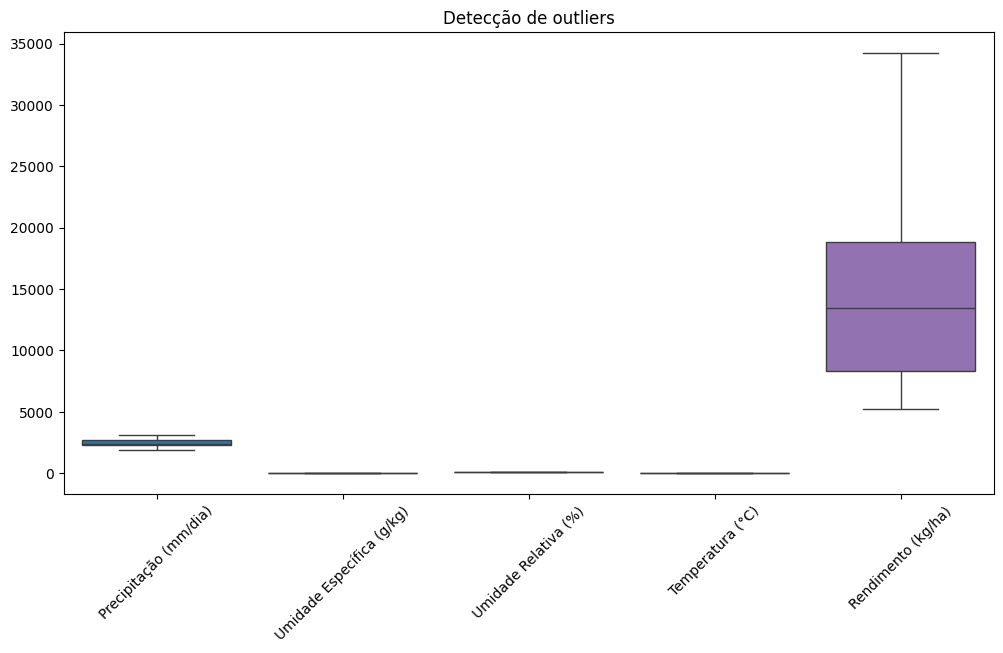

In [104]:
# Verificar a presença de outliers a partir da apresentação do Boxplot

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Detecção de outliers")
plt.xticks(rotation=45)
plt.show()

## **↪ Dados para treinamento e aprovação**

In [105]:
# Iniciando o processo de label encoder
le = LabelEncoder()
y = df["Cultura"]

# Aplicando Label Encoding na coluna 'Cultura'
df["Cultura"] = le.fit_transform(y)

# Verifica fromatação após realização do label
df.head()

,Cultura,Precipitação (mm/dia),Umidade Específica (g/kg),Umidade Relativa (%),Temperatura (°C),Rendimento (kg/ha)
0,0,2248.92,17.72,83.40,26.01,11560.0
1,0,1938.42,17.54,82.11,26.11,11253.0
2,0,2301.54,17.81,82.79,26.24,9456.0
3,0,2592.35,17.61,85.07,26.13,9321.0
4,0,2344.72,17.61,84.12,25.76,8800.0


In [106]:
# Separando features e labels
X_estat = df

In [107]:
# Calcular as estatísticas descritivas
estatisticas = pd.DataFrame({
    "Média": X_estat.mean(),
    "Mediana": X_estat.median(),
    "Desvio Padrão": X_estat.std()
    })

# Exibir as estatísticas
print("Estatísticas descritivas:")
print(estatisticas)

Estatísticas descritivas:
                                  Média     Mediana  Desvio Padrão
Cultura                        1.500000      1.5000       1.121635
Precipitação (mm/dia)       2486.498974   2424.5500     289.457914
Umidade Específica (g/kg)     18.203077     18.2700       0.293923
Umidade Relativa (%)          84.737692     84.8500       0.996226
Temperatura (°C)              26.148718     26.1300       0.173617
Rendimento (kg/ha)         14996.865385  13419.4375    8061.876535


In [108]:
# Separando os valores para o eixo X que seram nosso parametros de
X = df.drop("Rendimento (kg/ha)", axis=1)

# Separando os valores para o eixo Y
Y = df["Rendimento (kg/ha)"]

In [109]:
# Aplicando MinMaxScaler
scaler_minmax = MinMaxScaler()
X_minmax_scaled = scaler_minmax.fit_transform(X)

# Salvando os nomes das colunas par exibição
colunas = ["Cultura", "Precipitação (mm/dia)", "Umidade Específica (g/kg)", "Umidade Relativa (%)", "Temperatura (°C)"]

# Mostrando as primeiras linhas dos dados escalados
df_minmax = pd.DataFrame(X_minmax_scaled,  columns = colunas)
df_minmax.head()

,Cultura,Precipitação (mm/dia),Umidade Específica (g/kg),Umidade Relativa (%),Temperatura (°C)
0,0.0,0.273027,0.155172,0.323308,0.342466
1,0.0,0.003301,0.000000,0.000000,0.479452
2,0.0,0.318737,0.232759,0.170426,0.657534
3,0.0,0.571358,0.060345,0.741855,0.506849
4,0.0,0.356246,0.060345,0.503759,0.000000


In [110]:
# Atualizando os valores para o eixo X após MinMaxScaler
X = df_minmax

In [111]:
# Dividindo os dados em conjuntos de treino e teste (70% treino, 30% teste)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=65)

# Conjuntos de dados
print(f'Tamanho do conjunto de dados original: {X.shape}')
print(f'Tamanho do conjunto de treinamento: {x_train.shape}')
print(f'Tamanho do conjunto de teste: {x_test.shape}')

# Exibir as primeiras linhas do conjunto antes e depois do split
print("\nConjunto de dados antes do split:")
display(df["Rendimento (kg/ha)"].head())
print("Conjunto de treinamento:")
display(y_train.head())

Tamanho do conjunto de dados original: (156, 5)
Tamanho do conjunto de treinamento: (109, 5)
Tamanho do conjunto de teste: (47, 5)

Conjunto de dados antes do split:


,Rendimento (kg/ha)
0,11560.0
1,11253.0
2,9456.0
3,9321.0
4,8800.0


Conjunto de treinamento:


,Rendimento (kg/ha)
34,11108.0
135,5249.0
133,6008.0
88,28178.0
89,29918.0


## **↪ Construção dos modelos preditivos**

In [112]:
# Gera dicionário para armazenar as acurácias de cada modelo e posteriormente rankear
modelos = {}

In [113]:
# Regressão Linear

logreg = LinearRegression()
logreg.fit(x_train, y_train)
y_pred_logreg = logreg.predict(x_test)

# Resultados
ScoreRL = r2_score(y_test, y_pred_logreg)
print("Acurácia Regressão Logística:", ScoreRL)
print("Erro médio absoluto:",mean_absolute_error(y_test, y_pred_logreg))

# Armazena valor
modelos ['Regressão Logística'] = ScoreRL

Acurácia Regressão Logística: -0.023581405668999356
Erro médio absoluto: 6473.011845892213


In [114]:
# KNN - 10 vizinhos

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

# Resultados
ScoreKNN = r2_score(y_test, y_pred_knn)
print("Acurácia KNN:", ScoreKNN)
print("Erro médio absoluto:",mean_absolute_error(y_test, y_pred_knn))

# Armazena valor
modelos ['KNN'] = ScoreKNN

Acurácia KNN: 0.5496877530713207
Erro médio absoluto: 4036.4938829787225


In [115]:
# SVM com kernel RBF -> mais complexo
svm_rbf = SVR(kernel='rbf')
svm_rbf.fit(x_train, y_train)
y_pred_svm_rbf = svm_rbf.predict(x_test)

# Resultados
ScoreSVM_RBF = r2_score(y_test, y_pred_svm_rbf)
print("Acurácia SVM (RBF):", ScoreSVM_RBF)
print("Erro médio absoluto:",mean_absolute_error(y_test, y_pred_svm_rbf))

# Armazena valor
modelos ['SVM (RBF)'] = ScoreSVM_RBF

Acurácia SVM (RBF): -0.0016736526732521462
Erro médio absoluto: 6101.141988803411


In [116]:
# SVM com kernel polinomial -> intermediário
svm_poly = SVR(kernel='poly')
svm_poly.fit(x_train, y_train)
y_pred_svm_poly = svm_poly.predict(x_test)

# Resultados
ScoreSVM_P = r2_score(y_test, y_pred_svm_poly)
print("Acurácia SVM (Polinomial):", ScoreSVM_P )
print("Erro médio absoluto:",mean_absolute_error(y_test, y_pred_svm_poly))

# Armazena valor
modelos ['SVM (Polinomial)'] = ScoreSVM_P

Acurácia SVM (Polinomial): 0.01843871361959104
Erro médio absoluto: 6079.2543147361885


In [117]:
# SVM com kernel linear -> o mais simples
svm_linear = SVR(kernel='linear')
svm_linear.fit(x_train, y_train)
y_pred_svm_linear = svm_linear.predict(x_test)

# Resultados
ScoreSVM_L = r2_score(y_test, y_pred_svm_linear)
print("Acurácia SVM (Linear):", ScoreSVM_L)
print("Erro médio absoluto:",mean_absolute_error(y_test, y_pred_svm_linear))

# Armazena valor
modelos ['SVM (Linear)'] = ScoreSVM_L

Acurácia SVM (Linear): -0.0024202442466931817
Erro médio absoluto: 6104.681585163392


In [118]:
# Decision Tree
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

# Resultados
ScoreDT = r2_score(y_test, y_pred_dt)
print("Acurácia Decision Tree:", ScoreDT)
print("Erro médio absoluto:",mean_absolute_error(y_test, y_pred_dt))

# Armazena valor
modelos ['Decision Tree'] = ScoreDT

Acurácia Decision Tree: 0.6374616493222777
Erro médio absoluto: 2255.869680851064


In [119]:
# Random Forest
rf = RandomForestRegressor(n_estimators=25)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

# Resultados
ScoreRFO = r2_score(y_test, y_pred_rf)
print("Acurácia Random Forest:", ScoreRFO)
print("Erro médio absoluto:",mean_absolute_error(y_test, y_pred_rf))

# Armazena valor
modelos ['Random Forest'] = ScoreRFO

Acurácia Random Forest: 0.753428485003922
Erro médio absoluto: 2186.6895744680846


In [120]:
# CONCLUSÃO

# Gerar o ranking das acurácias
ranking = sorted(modelos.items(), key=lambda x: x[1], reverse=True)

# Exibir o ranking
print("Ranking dos Mellhores Modelos:\n")
for i, (model, accuracy) in enumerate(ranking, 1):
    print(f"{i}. {model}: {accuracy:.4f}")


Ranking dos Mellhores Modelos:

1. Random Forest: 0.7534
2. Decision Tree: 0.6375
3. KNN: 0.5497
4. SVM (Polinomial): 0.0184
5. SVM (RBF): -0.0017
6. SVM (Linear): -0.0024
7. Regressão Logística: -0.0236
